In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplstyles
%matplotlib inline

/home/jhaux/.local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 2-B

In [1]:
def X(HA, Phi=31.0442, DEC=43+62/60+25./3600.):
    return 1./ (np.cos(Phi)*np.cos(DEC)*np.cos(HA) + np.sin(Phi)*np.sin(DEC))

MV = -5.21
m0V = 5*np.log10(610) - 5 + 

## 2-C 
### 1)
Load the first dataset:

In [48]:
BV = np.genfromtxt('../data/BV_photometry.dat')
B = BV[:,0]
V = BV[:,1]
BmV = B-V

### 2)
Load the second dataset:

In [45]:
age = np.genfromtxt('../data/age_3.5gyr.dat')
V2 = age[:, 0]
B2 = age[:, 1]
B2mV2 = B2 - V2

Define mapping from apparent magnitude $m$ to absolute magnitude $M$ and vice versa, using the equation

\begin{align}
    m - M &= 5\operatorname{log}_{10}(d) - 5
\end{align}


In [49]:
def M(m, d=890):
    return m - 5*np.log10(d) + 5

def m(M, d=890):
    return 5*np.log10(d) - 5 + M

Correct the second dataset from absolute to apparent magnitudes and plot the corrected data:

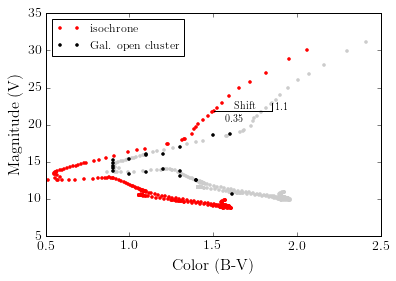

In [151]:
mV2 = m(V2)
mB2 = m(B2)
B2mV2 = mB2 - mV2

fig, ax = plt.subplots(1,1)
ax.plot(B2mV2, mV2, 
        '.r', 
        label='isochrone')
shiftBV = 0.35
shiftV = 1.1
ax.plot(B2mV2 + shiftBV, mV2 + shiftV, 
        '.', color=(0.8,0.8,0.8))
ax.plot(B-V, V, '.k', label='Gal. open cluster')

#x = 0.75
#y = 22
idx = 8
x = B2mV2[idx]
y = mV2[idx]

X1 = np.array([x, x+shiftBV])
Y1 = np.array([y, y])

X2 = np.array([x+shiftBV, x+shiftBV])
Y2 = np.array([y, y+shiftV])

ax.plot(X1, Y1, 'k')
ax.plot(X2, Y2, 'k')
ax.text(x+0.02+shiftBV, y, '{0}'.format(shiftV))
ax.text(x+0.07, y-1.5, '{0}'.format(shiftBV))
ax.text(x+0.12, y+0.1, 'Shift')

ax.set_xlabel('Color (B-V)')
ax.set_ylabel('Magnitude (V)')
ax.legend(loc=2)

fig.savefig('../pic/CMD.pdf')

The locus of the isochrone is shifted into the red with respect to the CMD. This is probably due to the age of the cluster as with age the light of the stars shifts to the red.